# Image enhancement: histograms


### 1. Overview & learning objectives
In this notebook we will work with histograms and learn about different ways to use a histogram to process images. 

With this notebook we will:

1. Generate the histogram of an image and study the main features of the histogram.

1. Use a histogram to increase the contrast of an image.

1. Use a histogram to select foreground *vs.* background pixels in an image.

### 2. Histograms
Let's go back to the image that we used last time. Load it into a variable called *animage* using **imread**:

In [1]:
# DELETE THIS CODE
from skimage import io, filters

animage = io.imread('cells.tif')

animage.dtype?


Type:            dtype
String form:     uint8
Length:          0
File:            ~/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py
Docstring:       <no docstring>
Class docstring:
dtype(obj, align=False, copy=False)

Create a data type object.

A numpy array is homogeneous, and contains elements described by a
dtype object. A dtype object can be constructed from different
combinations of fundamental numeric types.

Parameters
----------
obj
    Object to be converted to a data type object.
align : bool, optional
    Add padding to the fields to match what a C compiler would output
    for a similar C-struct. Can be ``True`` only if `obj` is a dictionary
    or a comma-separated string. If a struct dtype is being created,
    this also sets a sticky alignment flag ``isalignedstruct``.
copy : bool, optional
    Make a new copy of the data-type object. If ``False``, the result
    may just be a reference to a built-in data-type object.

See also
--------
result_type

Examples

Representing images as **numpy ndarrays** is really powerful. For example, thresholding, defined as the separation of foreground and background pixels, can be easily accomplished by:

In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rodrigo/opt/anaconda3/lib/

[[False False False ... False False False]
 [False False False ... False False False]
 [ True  True False ... False False False]
 ...
 [False  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


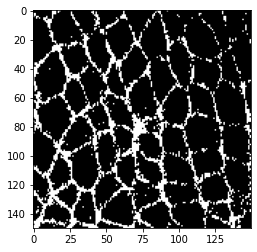

In [2]:
amask = animage > 150  # this creates a new array, notice the data type!!

print(amask)

import matplotlib.pyplot as plt

plt.imshow(amask, cmap='binary_r')  # set default color map to binary with 0-dark and 1-bright.
plt.show()

Here, the threshold value that separates foreground and background, **150**, is not arbitrary: it was selected based on the image histogram. In **numpy**, one can use the **histogram** function to create a histogram:

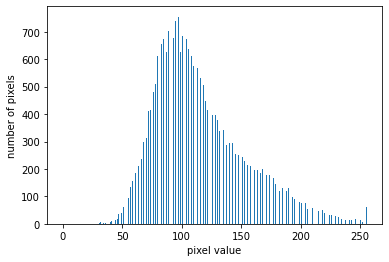

In [3]:
import matplotlib.pyplot as plt
import numpy

thehistogram, binedges = numpy.histogram(animage, bins=256, range=(0, 256), density=False)  # create the histogram.

# display the histogram using the matplotlib function bar. 
plt.figure()
plt.bar(binedges[:-1], thehistogram)
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()


For an image in which cell membranes are bright and the cell cytoplasm is dim, the most frequent pixel value (the **mode** of the histogram) represents the background signal (an estimate of the cytoplasmic signal). As you see, a  threshold of **150** separates the brightest tail of the histogram, corresponding to the membrane pixels, from the cytoplasmic signal. 

To understand what the **histogram** function  is doing, it is helpful to answer the following questions:

* what is stored in *binedges* and why are we passing *binedges[:-1]* to **matplotlib**'s **bar** function?
* what happens if you modify the *bins* parameter? how about *range*?
* what is the role of *density*? how does the histogram change if you set *density=True*?

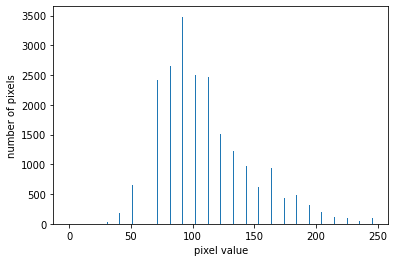

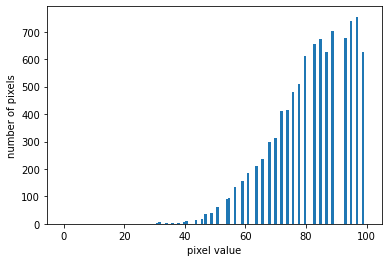

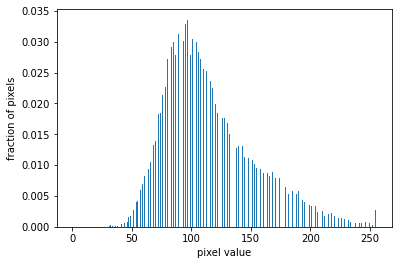

Signature:
numpy.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal t

In [4]:
# DELETE THIS CODE
numpy.histogram?

thehistogram, binedges = numpy.histogram(
    animage, bins=25, range=(0, 256), density=False)
plt.figure()
plt.bar(binedges[:-1], thehistogram)
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

thehistogram, binedges = numpy.histogram(
    animage, bins=256, range=(0, 100), density=False)
plt.figure()
plt.bar(binedges[:-1], thehistogram)
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

thehistogram, binedges = numpy.histogram(
    animage, bins=256, range=(0, 256), density=True)
plt.figure()
plt.bar(binedges[:-1], thehistogram)
plt.xlabel('pixel value')
plt.ylabel('fraction of pixels')
plt.show()


### 3. Contrast stretching
Last time we discussed how to use filtering to blur the bright structures that we want to detect, thus increasing their continuity. Let's go back to that image:

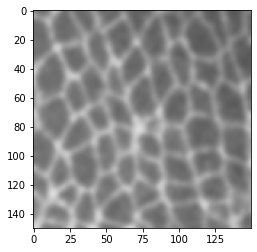

In [5]:
# DELETE THIS CODE.
animage_smooth = filters.gaussian(animage, sigma=2, preserve_range=True)  # this is a good sigma value, as it flattens the background while providing thick boundaries. 

plt.imshow(animage_smooth, cmap='Greys_r', vmin=0, vmax=255)  # imshow does a contrast stretching unless vmin and vmax are specified.
plt.show()


Pay attention to the pixel values in the smooth image and generate a histogram. Can you think of strategies to increase the contrast of this image? The method **skimage.exposure.rescale_intensity** may be useful.

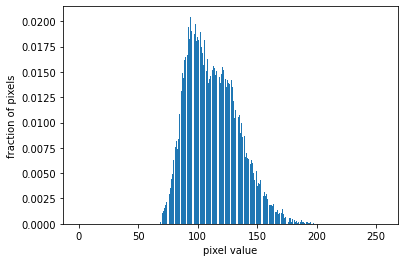

In [6]:
# DELETE THIS CODE
thehistogram, binedges = numpy.histogram(
    animage_smooth, bins=256, range=(0, 256), density=True)
plt.figure()
plt.bar(binedges[:-1], thehistogram)
plt.xlabel('pixel value')
plt.ylabel('fraction of pixels')
plt.show()


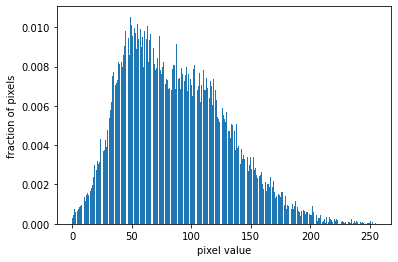

Signature: exposure.rescale_intensity(image, in_range='image', out_range='dtype')
Docstring:
Return image after stretching or shrinking its intensity levels.

The desired intensity range of the input and output, `in_range` and
`out_range` respectively, are used to stretch or shrink the intensity range
of the input image. See examples below.

Parameters
----------
image : array
    Image array.
in_range, out_range : str or 2-tuple, optional
    Min and max intensity values of input and output image.
    The possible values for this parameter are enumerated below.

    'image'
        Use image min/max as the intensity range.
    'dtype'
        Use min/max of the image's dtype as the intensity range.
    dtype-name
        Use intensity range based on desired `dtype`. Must be valid key
        in `DTYPE_RANGE`.
    2-tuple
        Use `range_values` as explicit min/max intensities.

Returns
-------
out : array
    Image array after rescaling its intensity. This image is the same dtype
 

In [7]:
# DELETE THIS CODE.
import skimage.exposure as exposure
exposure.rescale_intensity?

animage_rescaled = exposure.rescale_intensity(animage_smooth, out_range=numpy.uint8)

thehistogram, binedges = numpy.histogram(
    animage_rescaled, bins=256, range=(0, 256), density=True)
plt.figure()
plt.bar(binedges[:-1], thehistogram)
plt.xlabel('pixel value')
plt.ylabel('fraction of pixels')
plt.show()


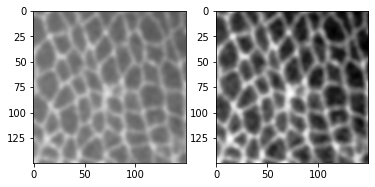

In [8]:
# DELETE THIS CODE
fig, axs = plt.subplots(1, 2)  
axs[0].imshow(animage_smooth, cmap='Greys_r', vmin=0, vmax=255)  # imshow normalizes data to the(0, 1) range by default.
axs[1].imshow(animage_rescaled, cmap='Greys_r', vmin=0, vmax=255)  # imshow normalizes data to the(0, 1) range by default.
plt.show()


### 4. Thresholding
 Let's go back to our rescaled, smooth image *animage_rescaled*. Can you find a good threshold value to segment foreground and background? If yes, which one? If not, why?

[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


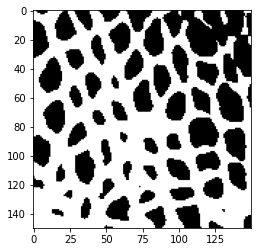

In [9]:
# DELETE THIS CODE.
amask = animage_rescaled > 70  # this creates a new array, notice the data type!!

print(amask)


# set default color map to binary with 0-dark and 1-bright.
plt.imshow(amask, cmap='binary_r')
plt.show()

# Illumination is not uniform, and thus, when one corner is properly thresholded, the opposite is not.


Proper thresholding often requires setting a different threshold value per pixel. This is known as **adaptive or local thresholding**. In local thresholding, the threshold value at each pixel depends on the neighbouring pixels (e.g. it is the mean of the pixels within a 3x3 window around each pixel). In scikit-image, local thresholding can be accomplished with the method **skimage.filters.threshold_local**.

Consult the documentation for threshold_local, and use local thresholding to obtain an accurate seggregation between interfacial and cytoplasmic pixels in the image above. What parameters did you use? Which ones did not work? How is the result different from the result using a single threshold for the entire image?

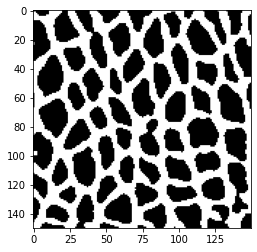

In [11]:
# DELETE THIS CODE

# this creates a new array, notice the data type!!
amask = animage_rescaled >= filters.threshold_local(animage_rescaled, 65, method='gaussian')  # 65 is a better value, 33 is useful to illustrate morphological operations in next lecture.


# set default color map to binary with 0-dark and 1-bright.
plt.imshow(amask, cmap='binary_r')
plt.show()

# The threshold results are uniform throughout the image, rather than favouring one of the image corners.
